<a href="https://colab.research.google.com/github/26Kenn07/Deep-Learning/blob/main/Cat%20VS%20Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.2MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [2]:
#Generators
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
    
)

Found 20000 files belonging to 2 classes.


In [3]:
#Generators
test = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
    
)

Found 5000 files belonging to 2 classes.


In [4]:
def PreProcess(img,label):
  img = tf.cast(img/255.,tf.float32)
  return img,label

In [5]:
train = train.map(PreProcess)
test = test.map(PreProcess)

In [6]:
#CNN model
#To overcome overfitting will do Dropout and Batch-Normalization

model = Sequential()

model.add(Conv2D(32, (3,3), activation ='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(256, (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))


In [7]:
model.add(Flatten())

In [8]:
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train,epochs=10,validation_data = test)

Epoch 1/10
625/625 [==============================] - 82s 116ms/step - loss: 0.8439 - accuracy: 0.5543 - val_loss: 0.6760 - val_accuracy: 0.5462
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6083 - accuracy: 0.6631 - val_loss: 0.6067 - val_accuracy: 0.6566
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.5256 - accuracy: 0.7398 - val_loss: 0.5167 - val_accuracy: 0.7256
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4387 - accuracy: 0.8044 - val_loss: 0.4030 - val_accuracy: 0.8194
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3488 - accuracy: 0.8529 - val_loss: 0.6442 - val_accuracy: 0.7836
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2565 - accuracy: 0.8962 - val_loss: 0.5723 - val_accuracy: 0.7888
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1692 - accuracy: 0.9346 - val_loss: 0.4005 - val_ac

In [12]:
import matplotlib.pyplot as plt

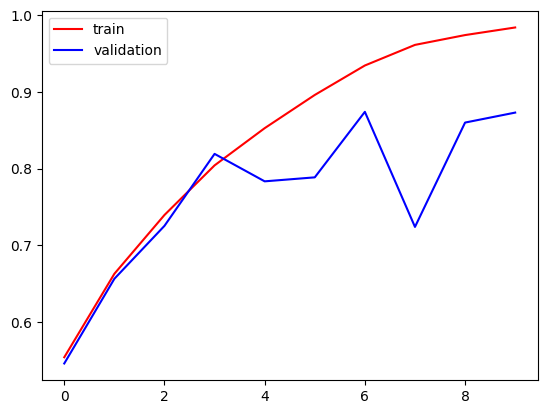

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

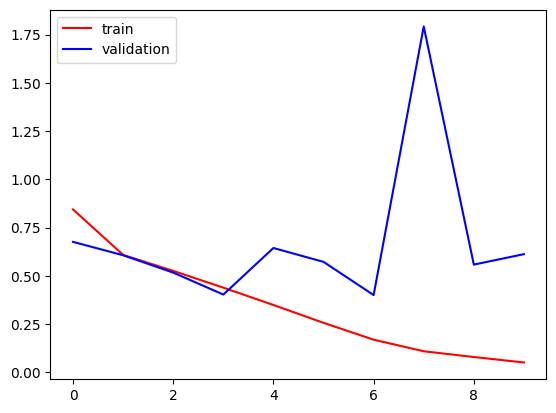

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [16]:
img = cv2.imread('/content/Unknown.jpg')

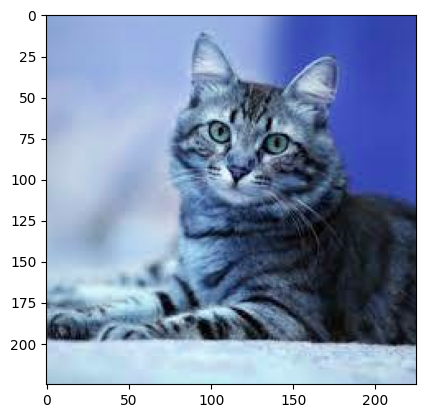

In [17]:
plt.imshow(img)

In [18]:
img.shape

(225, 225, 3)

In [19]:
img = cv2.resize(img,(256,256))

In [20]:
input = img.reshape((1,256,256,3))

In [21]:
model.predict(input)

1/1 [==============================] - 0s 331ms/step


array([[0.]], dtype=float32)

In [31]:
img2 = cv2.imread('/content/Unknown2.jpg')

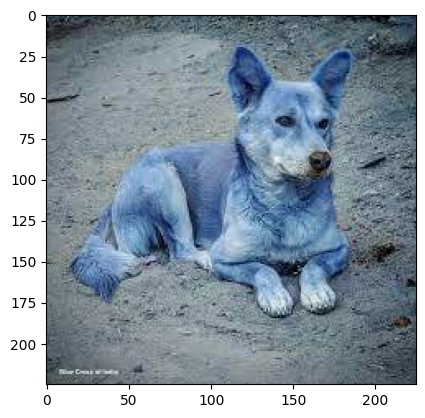

In [32]:
plt.imshow(img2)

In [33]:
img2.shape

(225, 225, 3)

In [34]:
img2 = cv2.resize(img2,(256,256))

In [35]:
input2 = img2.reshape((1,256,256,3))

In [36]:
model.predict(input2)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)